In [416]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from scipy import stats
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [417]:
test_depths = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 30]
# test_depths = [3, 6, 9, 12, 15, 18, 21, 24]
number_of_trees = 50


In [418]:
def get_data(name):
    train_data = pd.read_csv(name)
    X_train = train_data.values[:,:-1]
    Y_train = train_data.values[:,-1]

    return X_train, Y_train


In [419]:
def build_forest(X, Y, tree_depth):
    n = X.shape[0]
    trees = []

    for i in range(number_of_trees):
        tree1 = DecisionTreeClassifier(
            criterion='gini',
            max_depth=tree_depth,

            splitter='random',
            # max_features='sqrt',
        )

        random_choice = np.random.randint(n, size=n)
        X1 = X[random_choice]
        Y1 = Y[random_choice]

        tree1.fit(X1, Y1)
        trees.append(tree1)

    def predict(Q):
        predicted_classes = np.array(list(map(lambda tree: tree.predict(Q), trees)))
        most_common_class = stats.mode(predicted_classes).mode[0]
        return most_common_class

    return predict


In [420]:
def processing(test_number):
    X_train, Y_train = get_data(f'data/{test_number}_train.csv')
    X_test, Y_test = get_data(f'data/{test_number}_test.csv')

    accuracies = []

    for depth in test_depths:
        trained_model = build_forest(X_train, Y_train, depth)

        Y_predicted = trained_model(X_test)

        accuracy = metrics.accuracy_score(Y_test, Y_predicted)
        accuracies.append(accuracy)
        print(depth, 'accuracy', accuracy)

    plt.title('sample ' + test_number)
    plt.plot(test_depths, accuracies, marker='o')
    plt.show()


1 accuracy 0.3968131585710614
2 accuracy 0.4967874582369571
3 accuracy 0.6805448470830121
4 accuracy 0.7715240298123875
5 accuracy 0.8550501156515035
6 accuracy 0.8794654330506296
7 accuracy 0.9025957337445387
8 accuracy 0.9617065021845284
10 accuracy 0.9812387561038294
12 accuracy 0.9884348496530455
15 accuracy 0.9915188897455667
20 accuracy 0.9930609097918273
30 accuracy 0.9925469031097405


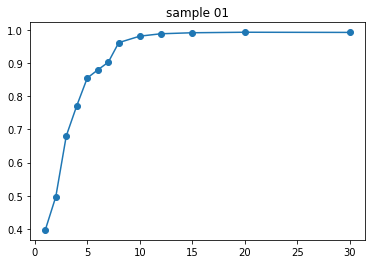

In [421]:
processing('01')


1 accuracy 0.33725490196078434
2 accuracy 0.4588235294117647
3 accuracy 0.5176470588235295
4 accuracy 0.6450980392156863
5 accuracy 0.615686274509804
6 accuracy 0.6823529411764706
7 accuracy 0.6725490196078432
8 accuracy 0.6843137254901961
10 accuracy 0.7019607843137254
12 accuracy 0.7254901960784313
15 accuracy 0.7352941176470589
20 accuracy 0.7098039215686275
30 accuracy 0.7372549019607844


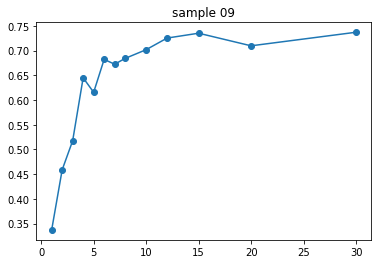

In [422]:
processing('09')


1 accuracy 0.9501501501501501
2 accuracy 0.9519519519519519
3 accuracy 0.954954954954955
4 accuracy 0.978978978978979
5 accuracy 0.9837837837837838
6 accuracy 0.9987987987987988
7 accuracy 0.9981981981981982
8 accuracy 0.9987987987987988
10 accuracy 0.9987987987987988
12 accuracy 0.9981981981981982
15 accuracy 0.9987987987987988
20 accuracy 0.9987987987987988
30 accuracy 0.9987987987987988


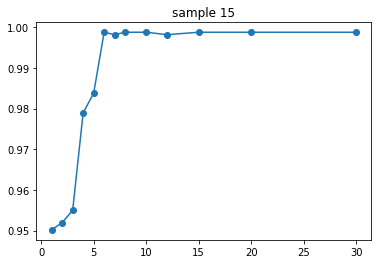

In [423]:
processing('15')

1 accuracy 0.28754885538805136
2 accuracy 0.3176996091568956
3 accuracy 0.3657174762702401
4 accuracy 0.45505304299274146
5 accuracy 0.5248464544946957
6 accuracy 0.5415968732551647
7 accuracy 0.592964824120603
8 accuracy 0.588498045784478
10 accuracy 0.6125069793411502
12 accuracy 0.6069235064209939
15 accuracy 0.6041317699609157
20 accuracy 0.6002233389168062
30 accuracy 0.6030150753768844


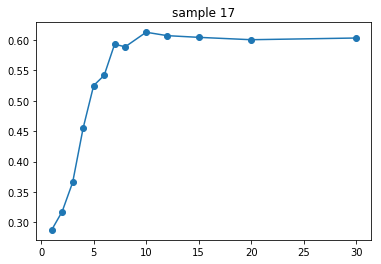

In [424]:
processing('17')


In [425]:
# a = np.array([[1, 2], [3, 4]])
# b = a[:,[0,1,0]]
#
# print(b)
# print(stats.mode(b.T).mode)


# print(a[[0]*5000,:])